In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
%matplotlib inline

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


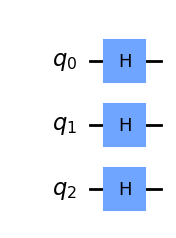

In [2]:
ckt = QuantumCircuit(3)
# ckt.h(1)            
ckt.h([0, 1, 2])            # Applying Hadamard to all
ckt.draw(output='mpl')

# Before Measurement

In [3]:
# 8 basis states for 3 qubit system
simulator = Aer.get_backend('statevector_simulator')
result = execute(ckt, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

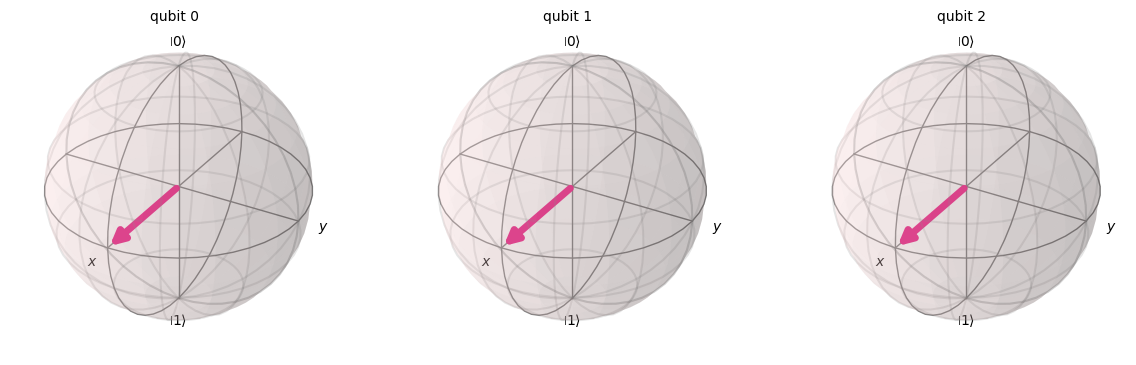

In [4]:
plot_bloch_multivector(statevector)

# After Measurement

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


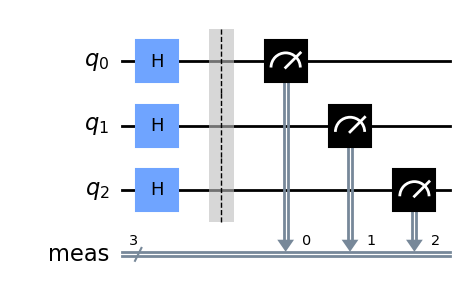

In [5]:
# For single measurement(1-shot), we will get only one outcome as 1
ckt.measure_all()
ckt.draw(output='mpl')

In [6]:
result = execute(ckt, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

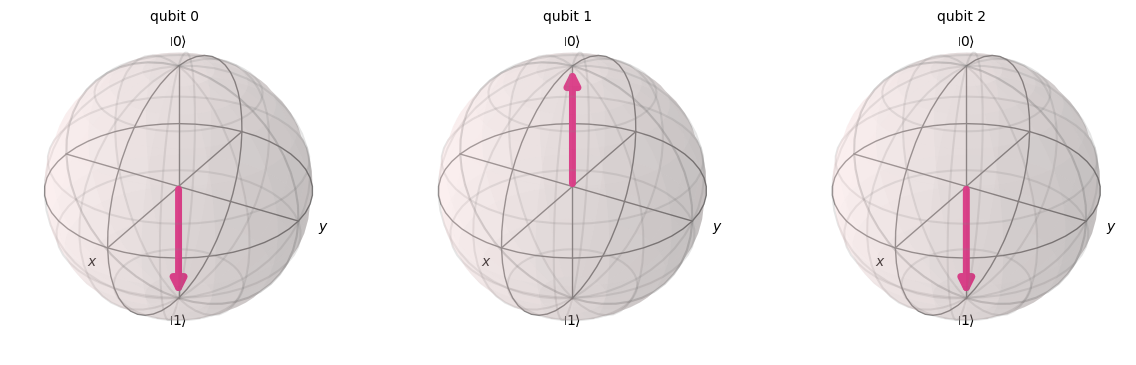

In [7]:
plot_bloch_multivector(statevector)

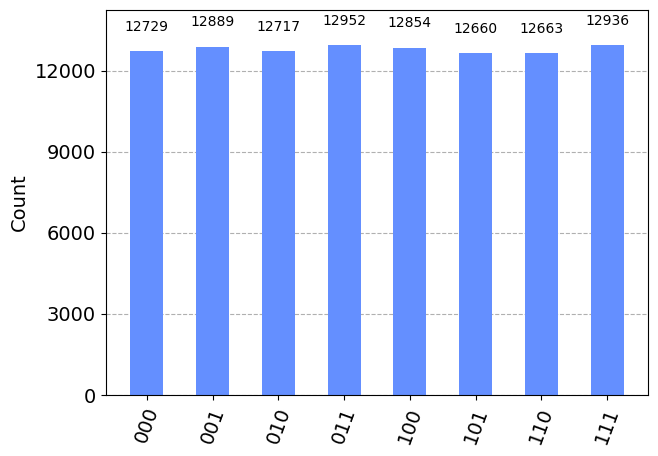

In [8]:
"""
Applying hadamard to all makes the chances to be equal for all, i.e. uniform superposition
In this scenario, the chances of happening each outcome is equal, and it is 1/8 or 0.125
"""
simulator = Aer.get_backend('qasm_simulator')
result = execute(ckt, backend=simulator, shots=102400).result()
plot_histogram(result.get_counts())